In [23]:
import pandas as pd
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
names = ['Class','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

data = pd.read_csv("letters.csv",names = names)

In [3]:
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data.shape

(20000, 17)

In [5]:
DS = []
for i in range(1,len(data.columns)):
    DS_new = data.assign()
    DS_new.iloc[:,i]= "?"
    DS.append(DS_new)
    ds=pd.concat(DS)
print(ds)

      Class x-box y-box width high onpix x-bar y-bar x2bar y2bar xybar x2ybr  \
0         T     ?     8     3    5     1     8    13     0     6     6    10   
1         I     ?    12     3    7     2    10     5     5     4    13     3   
2         D     ?    11     6    8     6    10     6     2     6    10     3   
3         N     ?    11     6    6     3     5     9     4     6     4     4   
4         G     ?     1     3    1     1     8     6     6     6     6     5   
...     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
19995     D     2     2     3    3     2     7     7     7     6     6     6   
19996     C     7    10     8    8     4     4     8     6     9    12     9   
19997     T     6     9     6    7     5     6    11     3     7    11     9   
19998     S     2     3     4    2     1     8     7     2     6    10     6   
19999     A     4     9     6    6     2     9     5     3     1     8     1   

      xy2br x-ege xegvy y-ege yegvx  
0

In [6]:
df = ds.replace(['?'], np.NAN)

In [7]:
df

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,NaN,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,I,NaN,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,D,NaN,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,N,NaN,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0
4,G,NaN,1.0,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2.0,2.0,3.0,3.0,2.0,7.0,7.0,7.0,6.0,6.0,6.0,4.0,2.0,8.0,3.0,NaN
19996,C,7.0,10.0,8.0,8.0,4.0,4.0,8.0,6.0,9.0,12.0,9.0,13.0,2.0,9.0,3.0,NaN
19997,T,6.0,9.0,6.0,7.0,5.0,6.0,11.0,3.0,7.0,11.0,9.0,5.0,2.0,12.0,2.0,NaN
19998,S,2.0,3.0,4.0,2.0,1.0,8.0,7.0,2.0,6.0,10.0,6.0,8.0,1.0,9.0,5.0,NaN


In [8]:
for i in df.columns[1:17]:
    mean_value=df[i].mean()
    df[i].fillna(value=mean_value, inplace=True)
    print('Updated Dataframe:')
    print(df)

Updated Dataframe:
      Class    x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T  4.02355    8.0    3.0   5.0    1.0    8.0   13.0    0.0    6.0   
1         I  4.02355   12.0    3.0   7.0    2.0   10.0    5.0    5.0    4.0   
2         D  4.02355   11.0    6.0   8.0    6.0   10.0    6.0    2.0    6.0   
3         N  4.02355   11.0    6.0   6.0    3.0    5.0    9.0    4.0    6.0   
4         G  4.02355    1.0    3.0   1.0    1.0    8.0    6.0    6.0    6.0   
...     ...      ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995     D  2.00000    2.0    3.0   3.0    2.0    7.0    7.0    7.0    6.0   
19996     C  7.00000   10.0    8.0   8.0    4.0    4.0    8.0    6.0    9.0   
19997     T  6.00000    9.0    6.0   7.0    5.0    6.0   11.0    3.0    7.0   
19998     S  2.00000    3.0    4.0   2.0    1.0    8.0    7.0    2.0    6.0   
19999     A  4.00000    9.0    6.0   6.0    2.0    9.0    5.0    3.0    1.0   

       xybar  x2ybr  xy2br  x-eg

      Class    x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T  4.02355    8.0    3.0   5.0    1.0    8.0   13.0    0.0    6.0   
1         I  4.02355   12.0    3.0   7.0    2.0   10.0    5.0    5.0    4.0   
2         D  4.02355   11.0    6.0   8.0    6.0   10.0    6.0    2.0    6.0   
3         N  4.02355   11.0    6.0   6.0    3.0    5.0    9.0    4.0    6.0   
4         G  4.02355    1.0    3.0   1.0    1.0    8.0    6.0    6.0    6.0   
...     ...      ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995     D  2.00000    2.0    3.0   3.0    2.0    7.0    7.0    7.0    6.0   
19996     C  7.00000   10.0    8.0   8.0    4.0    4.0    8.0    6.0    9.0   
19997     T  6.00000    9.0    6.0   7.0    5.0    6.0   11.0    3.0    7.0   
19998     S  2.00000    3.0    4.0   2.0    1.0    8.0    7.0    2.0    6.0   
19999     A  4.00000    9.0    6.0   6.0    2.0    9.0    5.0    3.0    1.0   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  ye

In [9]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.00000,320000.000000,320000.000000,320000.000000
mean,4.023550,7.035500,5.121850,5.372450,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.454000,7.929000,3.04610,8.338850,3.691750,7.801200
std,1.852416,3.199547,1.950556,2.189531,2.120852,1.961654,2.251461,2.614171,2.305168,2.409399,2.547463,2.014503,2.25842,1.497572,2.485499,1.566072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.00000,8.000000,2.000000,7.000000
50%,4.000000,7.035500,5.000000,5.372450,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.00000,8.000000,3.691750,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.00000,9.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000


In [10]:
X = df.iloc[:, 1:17]
Y = df.select_dtypes(include=[object])

In [11]:
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,4.02355,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0000
1,4.02355,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0000
2,4.02355,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0000
3,4.02355,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0000
4,4.02355,1.0,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.00000,2.0,3.0,3.0,2.0,7.0,7.0,7.0,6.0,6.0,6.0,4.0,2.0,8.0,3.0,7.8012
19996,7.00000,10.0,8.0,8.0,4.0,4.0,8.0,6.0,9.0,12.0,9.0,13.0,2.0,9.0,3.0,7.8012
19997,6.00000,9.0,6.0,7.0,5.0,6.0,11.0,3.0,7.0,11.0,9.0,5.0,2.0,12.0,2.0,7.8012
19998,2.00000,3.0,4.0,2.0,1.0,8.0,7.0,2.0,6.0,10.0,6.0,8.0,1.0,9.0,5.0,7.8012


In [12]:
Y

,Class
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [13]:
Y.Class.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [14]:
x_train,x_test, y_train, y_test= model_selection.train_test_split(X,Y, test_size=0.2, random_state=10)

In [15]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (256000, 16)
x_test:  (64000, 16)
y_train:  (256000, 1)
y_test:  (64000, 1)


In [16]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 15), max_iter=1000, activation='logistic')

In [24]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 15), max_iter=1000)

In [25]:
mlp.fit(x_train, y_train)

print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

y_pred = mlp.predict(x_test)

print(classification_report(y_test, y_pred))

Training set score: 0.791629
Test set score: 0.789672
              precision    recall  f1-score   support

           A       0.91      0.89      0.90      2443
           B       0.65      0.80      0.72      2412
           C       0.85      0.84      0.84      2423
           D       0.75      0.73      0.74      2539
           E       0.74      0.74      0.74      2499
           F       0.78      0.73      0.75      2472
           G       0.69      0.75      0.72      2535
           H       0.66      0.63      0.64      2364
           I       0.87      0.80      0.83      2400
           J       0.86      0.81      0.83      2364
           K       0.76      0.80      0.78      2337
           L       0.91      0.84      0.87      2542
           M       0.88      0.88      0.88      2650
           N       0.83      0.81      0.82      2439
           O       0.74      0.77      0.76      2436
           P       0.85      0.83      0.84      2578
           Q       0.77    

In [26]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.789671875

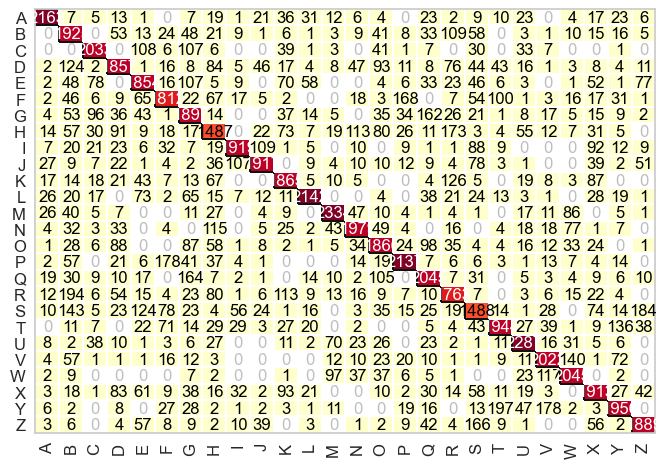

In [27]:
cm.score(x_test,y_test)

In [42]:
y_pred = mlp.predict(x_test)

In [43]:

# text report showing the main classification metrics
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.757     0.910     0.827       786
           1      0.751     0.483     0.588       443

    accuracy                          0.756      1229
   macro avg      0.754     0.696     0.707      1229
weighted avg      0.755     0.756     0.741      1229



### DATASET 2

In [29]:
data2 = pd.read_csv("diabetes.csv")

In [30]:
data2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
DS1 = []
dim = len(data2.columns) -1
for i in range(0,dim):
    DS_new1 = data2.assign()
#     print(mean(DS_new)) 
    DS_new1.iloc[:,i]= "?"
    DS1.append(DS_new1)
    ds1=pd.concat(DS1)
print(ds1)

    Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI Pedigree  \
0             ?     148            72            35       0  33.6    0.627   
1             ?      85            66            29       0  26.6    0.351   
2             ?     183            64             0       0  23.3    0.672   
3             ?      89            66            23      94  28.1    0.167   
4             ?     137            40            35     168  43.1    2.288   
..          ...     ...           ...           ...     ...   ...      ...   
763          10     101            76            48     180  32.9    0.171   
764           2     122            70            27       0  36.8     0.34   
765           5     121            72            23     112  26.2    0.245   
766           1     126            60             0       0  30.1    0.349   
767           1      93            70            31       0  30.4    0.315   

    Age  Outcome  
0    50        1  
1    31        0  
2    3

In [32]:
df1 = ds1.replace(['?'], np.NAN)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,NaN,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,NaN,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,NaN,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,NaN,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,NaN,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,NaN,1


In [33]:
for i in df1.columns[0:8]:
    mean_value=df1[i].mean()
    df1[i].fillna(value=mean_value, inplace=True)
    print('Updated Dataframe:')
    print(df1)

Updated Dataframe:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0       3.845052    148.0           72.0           35.0      0.0  33.6   
1       3.845052     85.0           66.0           29.0      0.0  26.6   
2       3.845052    183.0           64.0            0.0      0.0  23.3   
3       3.845052     89.0           66.0           23.0     94.0  28.1   
4       3.845052    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763    10.000000    101.0           76.0           48.0    180.0  32.9   
764     2.000000    122.0           70.0           27.0      0.0  36.8   
765     5.000000    121.0           72.0           23.0    112.0  26.2   
766     1.000000    126.0           60.0            0.0      0.0  30.1   
767     1.000000     93.0           70.0           31.0      0.0  30.4   

     Pedigree   Age  Outcome  
0       0.627  50.0        1  
1       0.351  31.0        0  

In [34]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.150155,29.890601,18.095381,14.913429,107.739456,7.370754,0.309753,10.994420,0.476680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.800000,0.256000,25.000000,0.000000
50%,3.845052,120.894531,70.000000,20.536458,63.000000,31.992578,0.431000,31.000000,0.000000
75%,5.000000,136.000000,78.000000,31.000000,114.000000,35.700000,0.583000,38.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
X = df1.iloc[:,0: 8]
Y = df1.iloc[:,8]

In [36]:
x_train,x_test, y_train, y_test= model_selection.train_test_split(X,Y, test_size=0.2, random_state=10)

In [37]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(500, 600), max_iter=10000, activation='logistic')

In [39]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(500, 600),
              max_iter=10000)

In [40]:
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

Training set score: 0.763784
Test set score: 0.755899


In [41]:
y_pred = mlp.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       786
           1       0.75      0.48      0.59       443

    accuracy                           0.76      1229
   macro avg       0.75      0.70      0.71      1229
weighted avg       0.76      0.76      0.74      1229

